
### The data is related with direct marketing campaigns of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pd.pandas.set_option('display.max_columns', None)
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
dataset = pd.read_excel('TermDeposit.xlsx')
dataset.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# Exploratory Data Analysis

In [3]:
df = dataset.copy()
df.rename(columns={'y': 'Term Deposit'}, inplace=True)

In [4]:
print(f'Shape of dataset : {df.shape}')
print(f'The total number of rows : {df.shape[0]}')
print(f'The total number of columns : {df.shape[1]}')

Shape of dataset : (45211, 17)
The total number of rows : 45211
The total number of columns : 17


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  Term Deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observations
Numeric Features: Having int64 as dtype

1. age
2. balance
3. day
4. duration
5. campaign
6. pdays
7. previous

Categorical Features: Having object as dtype

1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. poutcome
10. target - (Binary)

### Checking for null & duplicate values

In [6]:
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Term Deposit    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
display(df.describe().transpose())
print('-'*70)
print('Total Negative Values under **balance** feature')
display(df[df['balance'] < 0].shape[0])
print('-'*70)
display(df[df['pdays'] == -1]['pdays'].value_counts())
print('-'*70)
display(df[df['previous'] == 0]['previous'].value_counts())

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

----------------------------------------------------------------------
Total Negative Values under **balance** feature


3766

----------------------------------------------------------------------


pdays
-1    36954
Name: count, dtype: int64

----------------------------------------------------------------------


previous
0    36954
Name: count, dtype: int64

#### Observations
1. **age**: It is evenly distributed as mean(40.9) and median(39) are close, but there are few outliers.
2. **balance**. Evenly distributed around zero as there are many customers (3766) with negative balance. There are also customers with very high balance. Hence right skewed with mean(1362.27) greater than median(448).
3. **day**: It is evenly distributed.
4. **duration**: It is skewed towards right as mean(258.16) is greater than median(180) and there are many outliers and few with very large values.
5. **campaign**: Evenly distributed when you consider quartiles Q1, Q2 and Q3. However it is skewed towards right as there are outliers with high values.
6. **pdays**: There are many "-1"  as can be seen from min, Q1,Q2,Q3 values. This could be mistyped values. There are many customers who were contacted month after the last contact as can be seen from the mean (40 days) and there are many outliers with large values as well.
7. **previous**: There are many "0" as can be seen from min,Q1,Q2,Q3 values, which means many customers were contacted for the first time. There are many outliers with large values as well and hence highly skewed.

## Numerical Feature Data Analysis

### Age Distribution

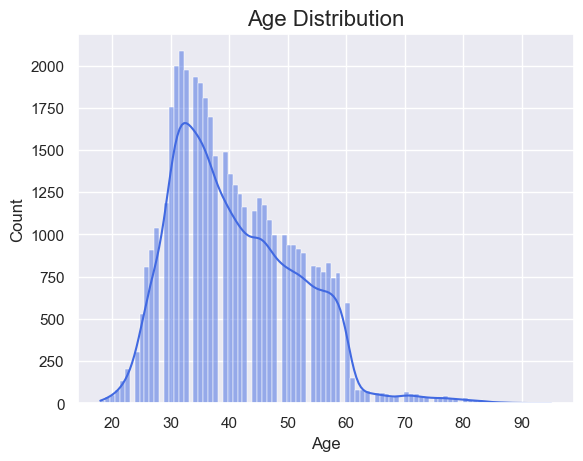

In [9]:
sns.histplot(data=df, x='age', color='royalblue', kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

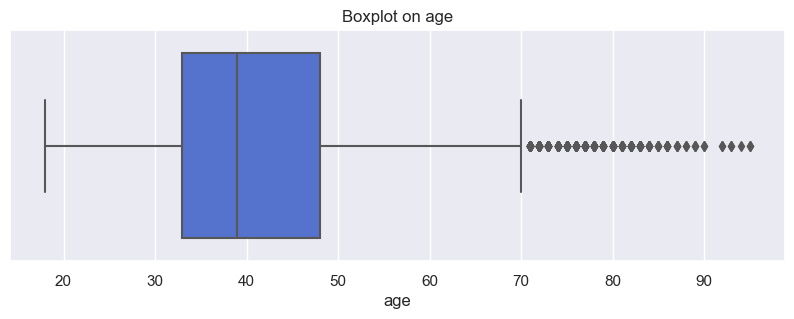

In [10]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.age, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on age')
plt.show()

### Balance Distribution

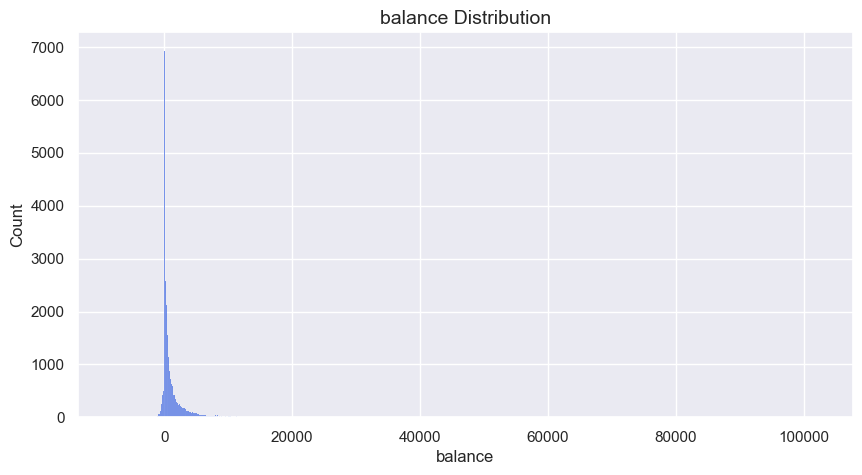

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='balance', color='royalblue', kde=False)
plt.title('balance Distribution', fontsize=14)
plt.xlabel('balance')
plt.ylabel('Count')
plt.show()

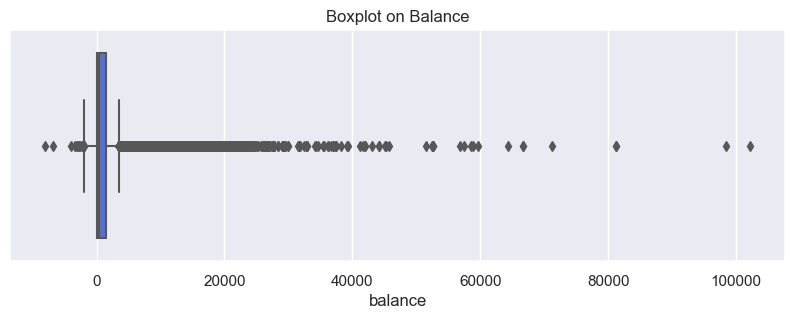

In [12]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.balance, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on Balance')
plt.show()

### Duration Distribution

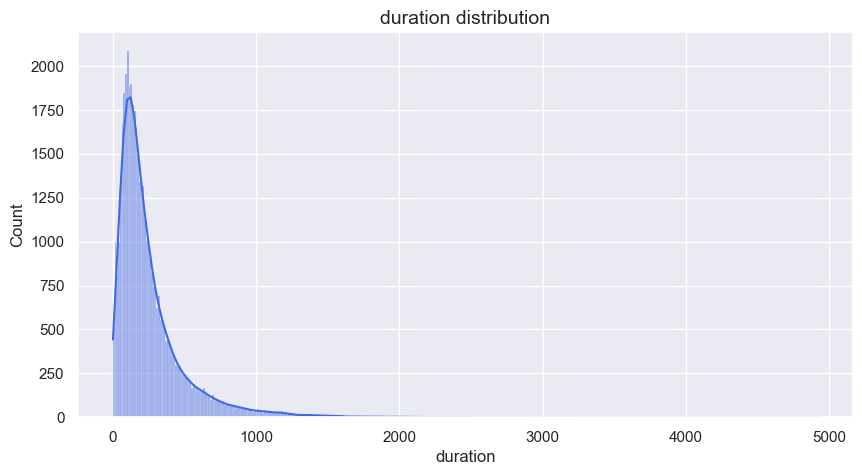

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='duration', color='royalblue', kde=True)
plt.title('duration distribution', fontsize=14)
plt.xlabel('duration')
plt.ylabel('Count')
plt.show()

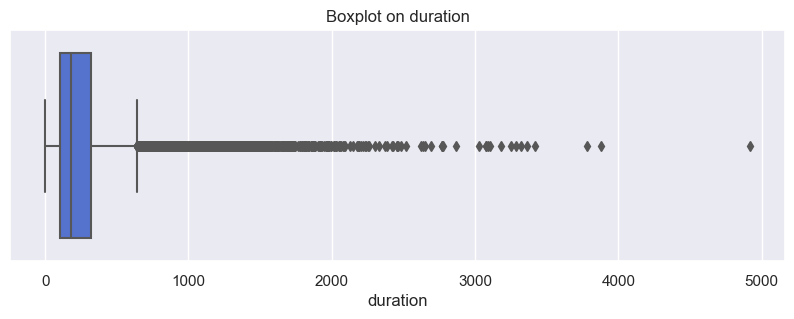

In [14]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.duration, showfliers=True, showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on duration')
plt.show()

### Day

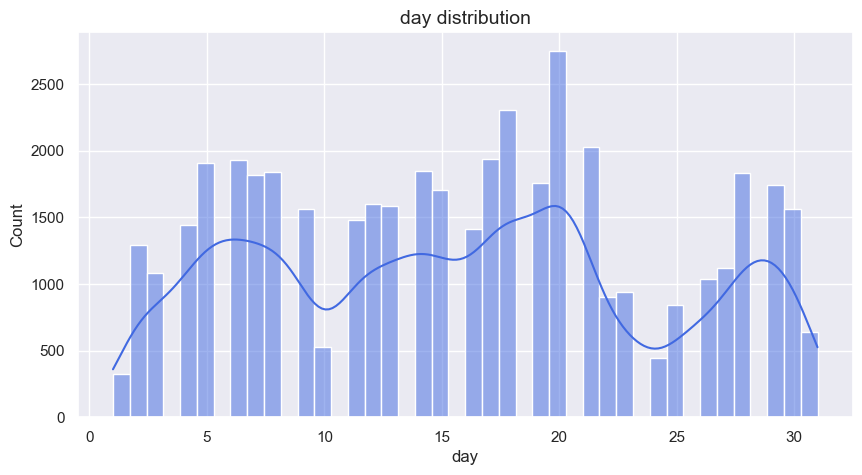

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='day', color='royalblue', kde=True)
plt.title('day distribution', fontsize=14)
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

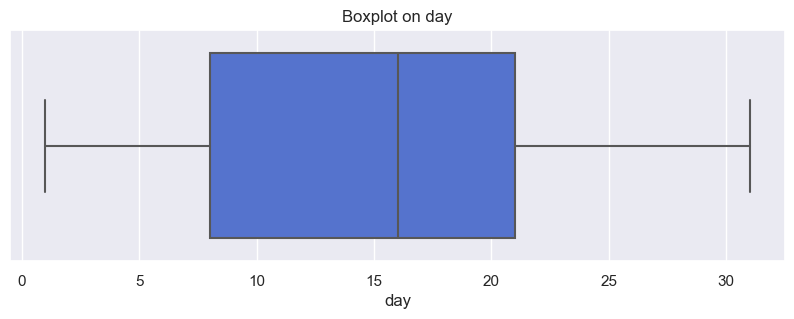

In [16]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.day, showfliers=True, 
            showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on day')
plt.show()

### Campaign 

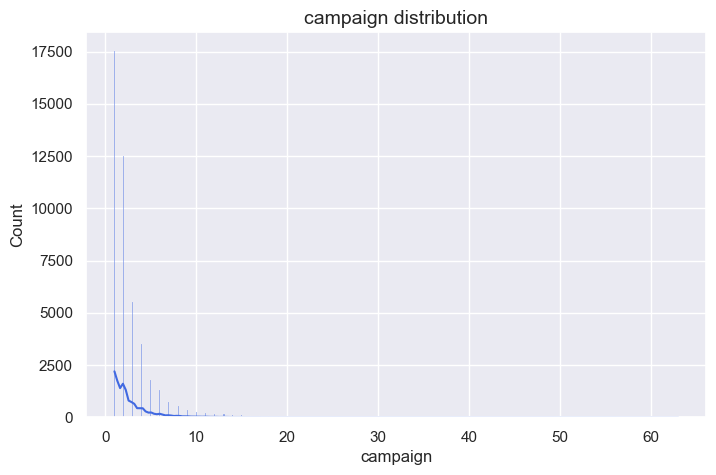

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='campaign', color='royalblue', kde=True)
plt.title('campaign distribution', fontsize=14)
plt.xlabel('campaign')
plt.ylabel('Count')
plt.show()

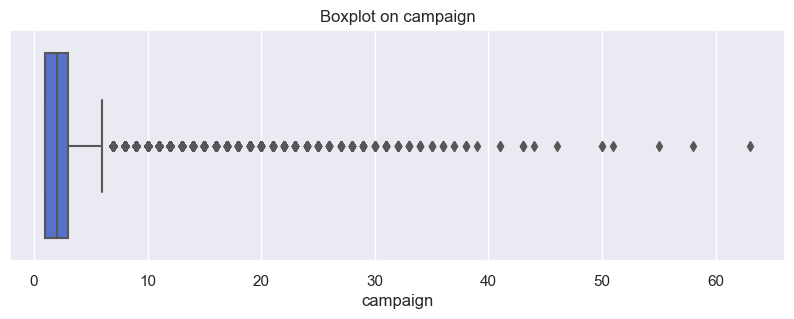

In [18]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.campaign, showfliers=True, 
            showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on campaign')
plt.show()

### pdays

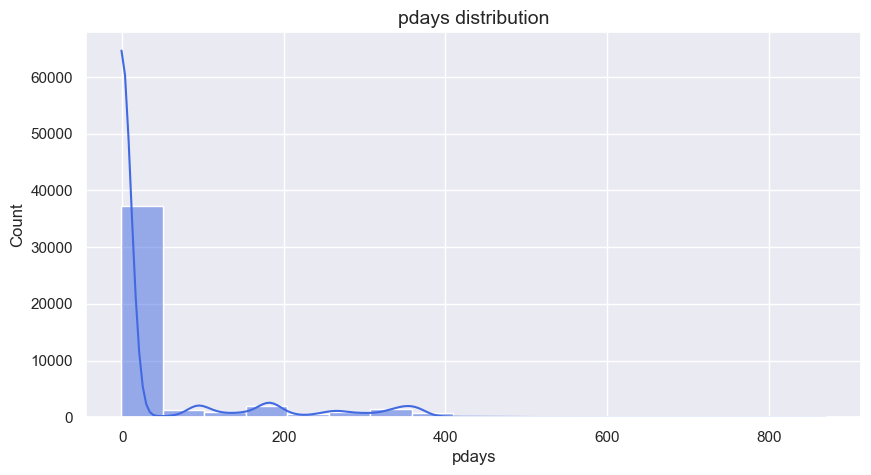

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='pdays', color='royalblue', kde=True)
plt.title('pdays distribution', fontsize=14)
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()

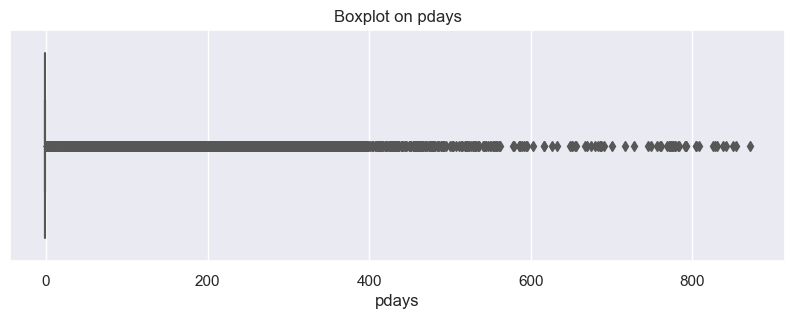

In [20]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.pdays, showfliers=True, 
            showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on pdays')
plt.show()

### Previous 

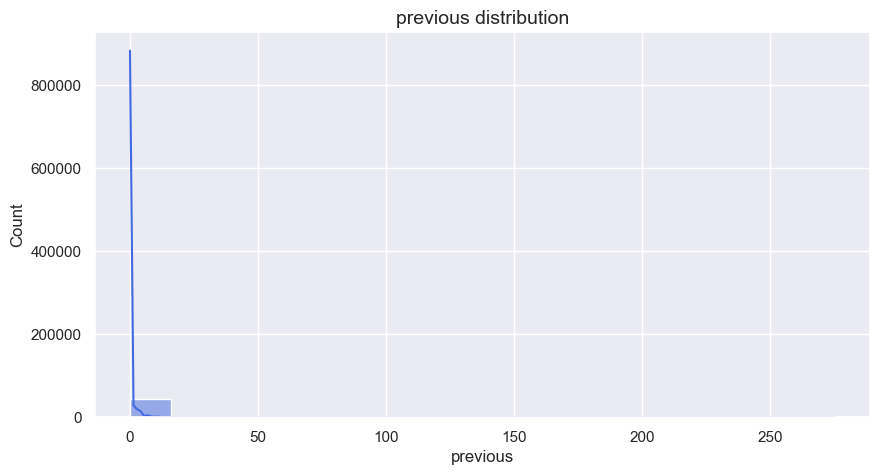

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='previous', color='royalblue', kde=True)
plt.title('previous distribution', fontsize=14)
plt.xlabel('previous')
plt.ylabel('Count')
plt.show()

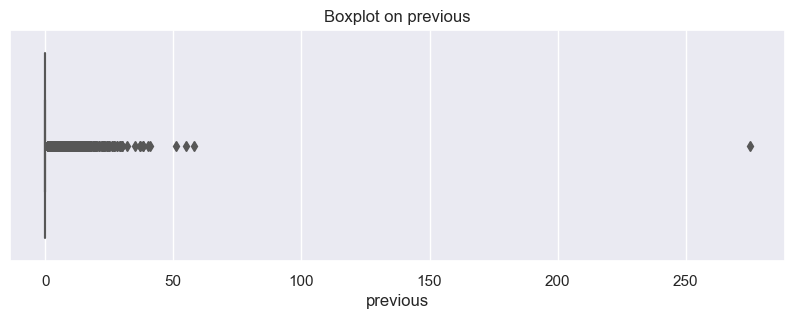

In [22]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df.previous, showfliers=True,
            showbox=True, whis=1.5, color='royalblue')
plt.title('Boxplot on previous')
plt.show()

#### Observations
1. **age**: It is evenly distributed with few outliers.
2. **balance**. Evenly distributed around zero as there are many customers with negative balance. There are also few customers with very large balance.
3. **day**: It is evenly distributed, No outliers.
4. **duration**: It is skewed towards right and there are many outliers and few with very large values.
5. **campaign**: It is skewed towards right as there are outliers with high values.
6. **pdays**: There are many "-1". There are many outliers with large values as well and hence highly skewed.
7. **previous**: There are many "0" which means many customers were contacted for the first time. There are many outliers with large values as well and hence highly skewed.

**Lot of outliers for balance duration, campaign,
There are no min,Q1,Q2,Q3,max for pdays and previous as data is highly imbalanced with "-1" and "0" respectively. Hence many values are considered outliers.**

### Measure of skewness

In [23]:
pd.DataFrame.from_dict(dict(
    {
        'age':df.age.skew(), 
        'balance': df.balance.skew(), 
        'day': df.day.skew(),
        'duration': df.duration.skew(),
        'campaign': df.campaign.skew(),
        'pdays': df.pdays.skew(),
        'previous': df.previous.skew(),        
    }), orient='index', columns=['Skewness'])

Skewness
age        0.684818
balance    8.360308
day        0.093079
duration   3.144318
campaign   4.898650
pdays      2.615715
previous  41.846454

#### Observations
1. No skewness for **day** feature as it is close to zero.
2. Minimal skewness for **age** feature as it is less than 1.
3. **balance** is highly skewed as there are outliers on both higher end and negative side.
4. **duration, campaign, pdays** are highly skewed towards right.
5. **previous** is very highly skewed with a value of 41.8 as there are lot of "0", and there are few records with large values i.e there are customers who were called several times before this campaign.

### Correleation Martrix 

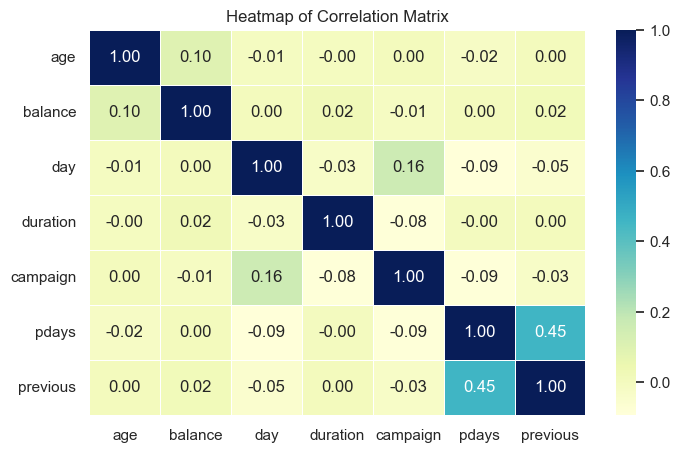

In [24]:
df_num  = df.select_dtypes(include=np.number)
correlation_matrix = df_num.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

#### Observations
As per the plot above, all the features are scattered randomly. There are no correlation between any of the numeric features except a partial correlation between **pdays** and **previous**

## Catagorical Feature data analysis

### Job 

In [25]:
print(df.select_dtypes(include=object).columns.to_list())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Term Deposit']


In [26]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

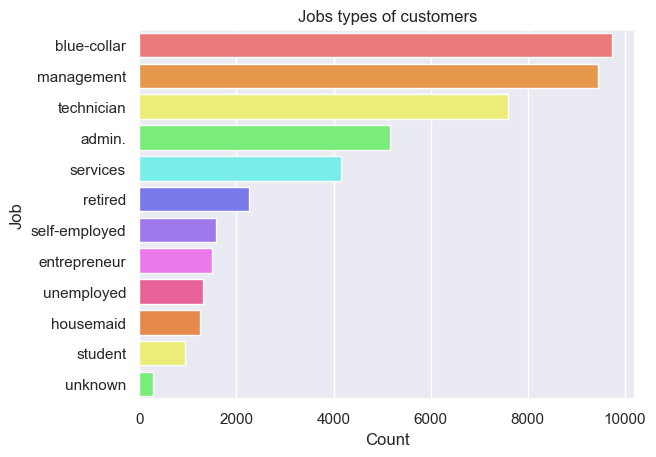

In [27]:
job_data = dict(df.job.value_counts())
sns.countplot(data=df, y=df.job,
              order = [i for i in job_data],
              palette = ['#FF6666', '#FF9933', '#FFFF66', '#66FF66', '#66FFFF', '#6666FF', '#9966FF', '#FF66FF', '#FF4D94', '#FF8533', '#FFFF66', '#66FF66']
             )
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Jobs types of customers')
plt.show()

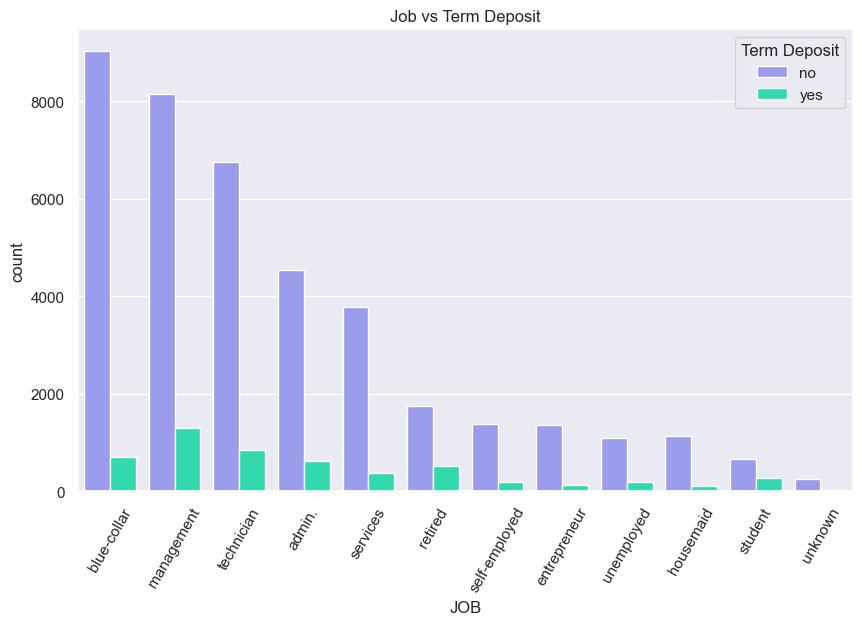

In [28]:
data =  dict(df.job.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df.job , hue=df['Term Deposit'], 
              palette=['#8E8FFA', '#15F5BA'], order=[i for i in  data])
plt.xlabel('JOB')
plt.xticks(rotation = 60)
plt.title('Job vs Term Deposit')
plt.show()

#### Obervations
1. Major customers have Blue collar jobs, students and unknown are minor customers
2. Customers in management jobs have most subscriptions to term deposits

### Marital

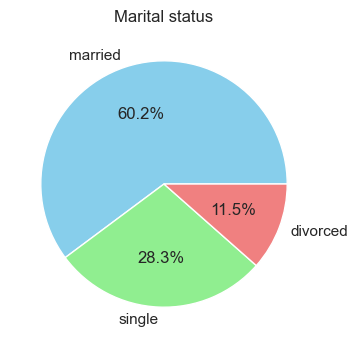

In [29]:
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(marital_counts, labels=marital_counts.index,
        autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Marital status')
plt.show()

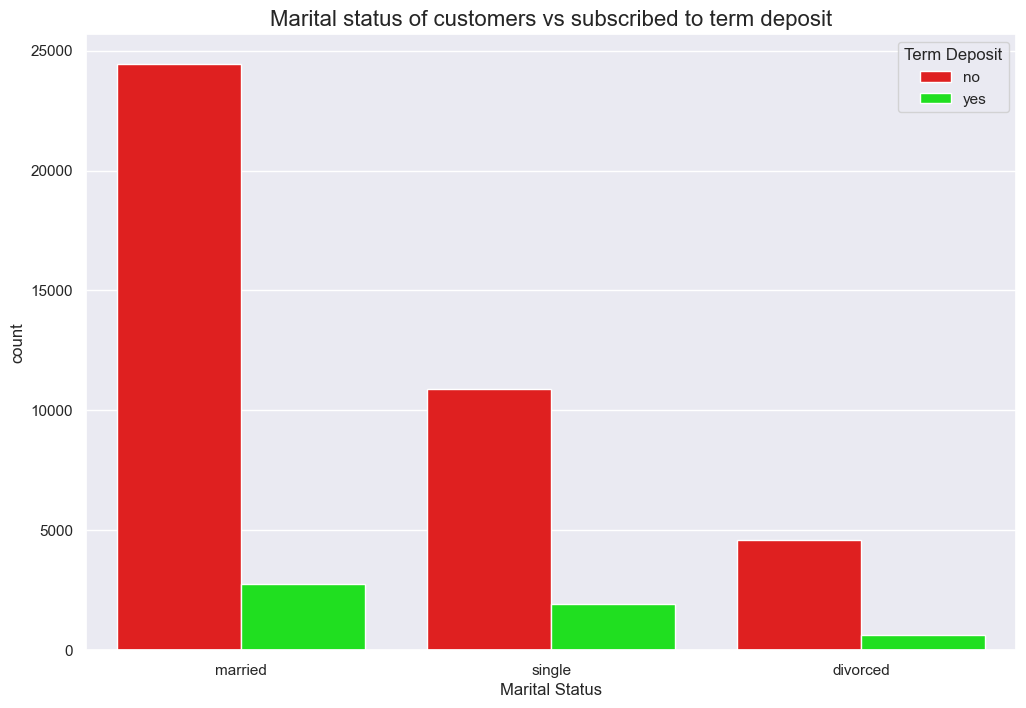

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x=df.marital,
              hue=df['Term Deposit'],
              palette=['red','lime'])
plt.title('Marital status of customers vs subscribed to term deposit',
          fontsize=16)
plt.xlabel('Marital Status')
plt.show()

### Education

In [31]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

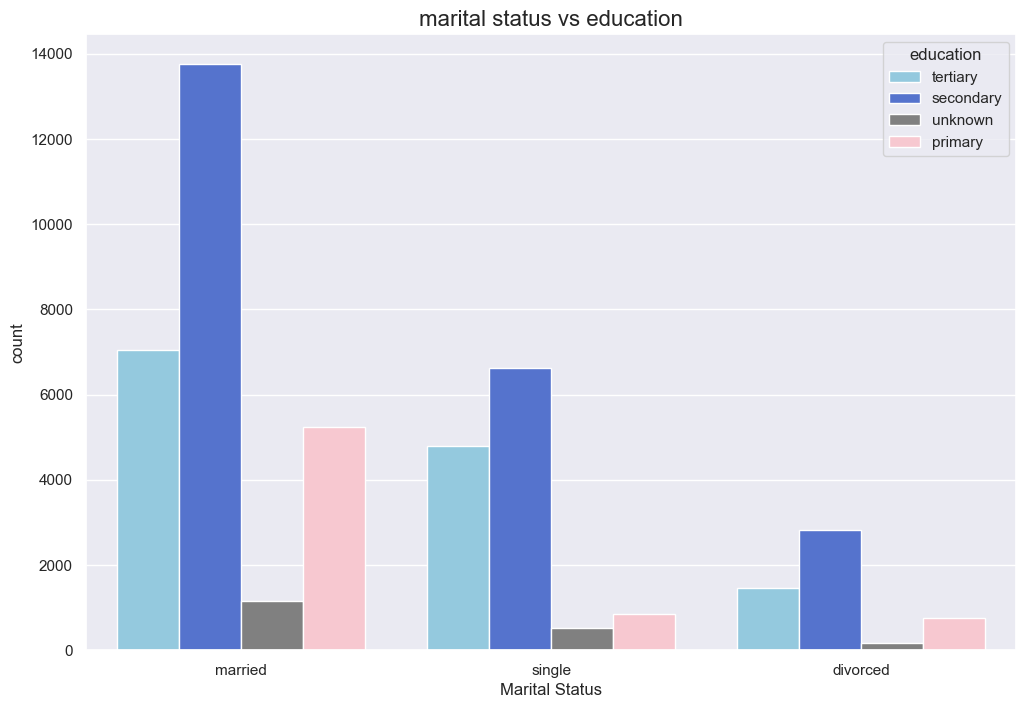

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x=df.marital, hue=df.education, palette=['skyblue', 'royalblue', 'grey', 'pink'])
plt.title('marital status vs education', fontsize=16)
plt.xlabel('Marital Status')
plt.show()

#### Observation
1. Majority of the customers have secondary education.
2. Married customers have more better education.

### Default

In [33]:
print(df.default.unique())

['no' 'yes']


In [34]:
print(df.default.value_counts())

default
no     44396
yes      815
Name: count, dtype: int64


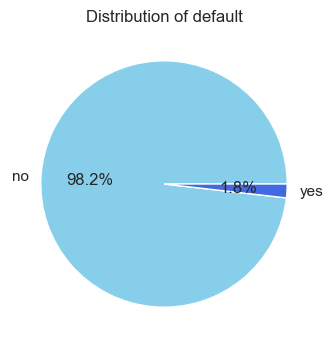

In [35]:
default_count = df['default'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(default_count, labels=default_count.index,
        autopct='%1.1f%%', colors=['skyblue', 'royalblue'])
plt.title('Distribution of default')
plt.show()

#### job vs averge balance

In [36]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

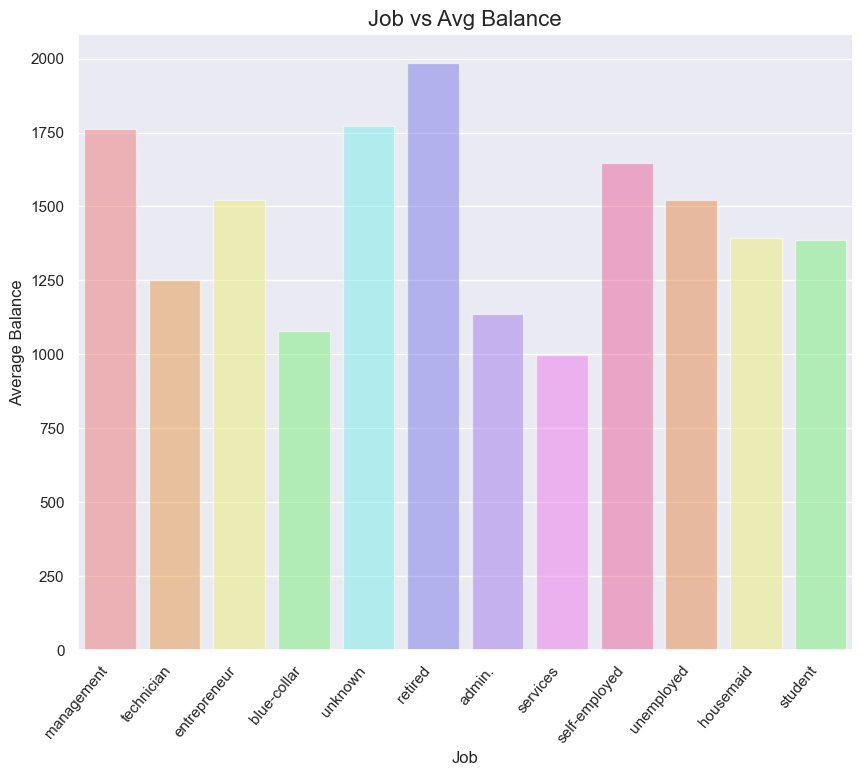

In [37]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df.job, y=df.balance,
            data=df, alpha=0.5,
            errorbar=None,
           palette = ['#FF6666', '#FF9933', '#FFFF66', '#66FF66', '#66FFFF', '#6666FF', '#9966FF', '#FF66FF', '#FF4D94', '#FF8533', '#FFFF66', '#66FF66']
)
plt.title('Job vs Avg Balance', fontsize=16)
plt.xlabel('Job')
plt.ylabel('Average Balance')
plt.xticks(rotation=50, ha='right')
plt.show()

#### Observation 
1. retired customers have high bank balance, while customers in services job have low bank balance.

#### Housing

In [38]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

#### Housing vsTerm Deposits

In [39]:
pd.crosstab(df.housing, df['Term Deposit'])

Term Deposit     no   yes
housing                  
no            16727  3354
yes           23195  1935

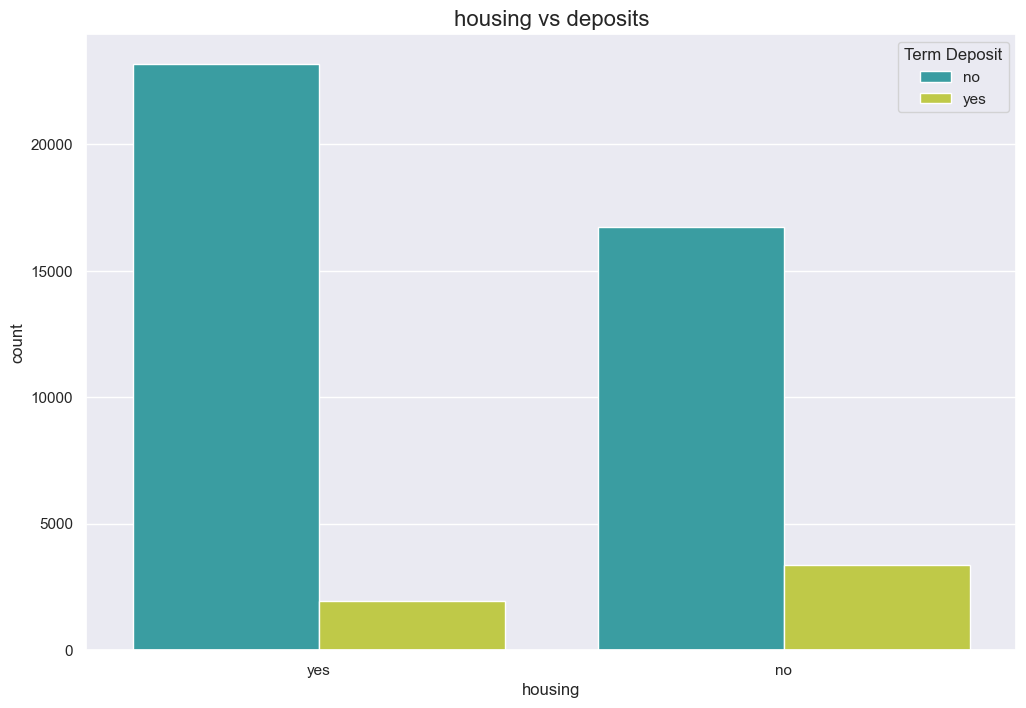

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x=df.housing, hue=df['Term Deposit'], palette=['#29ADB2', '#D2DE32'])
plt.title('housing vs deposits', fontsize=16)
plt.xlabel('housing')
plt.show()

#### Loans

In [41]:
df.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

#### Loan vs Deposits

In [42]:
pd.crosstab(df.loan, df['Term Deposit'])

Term Deposit     no   yes
loan                     
no            33162  4805
yes            6760   484

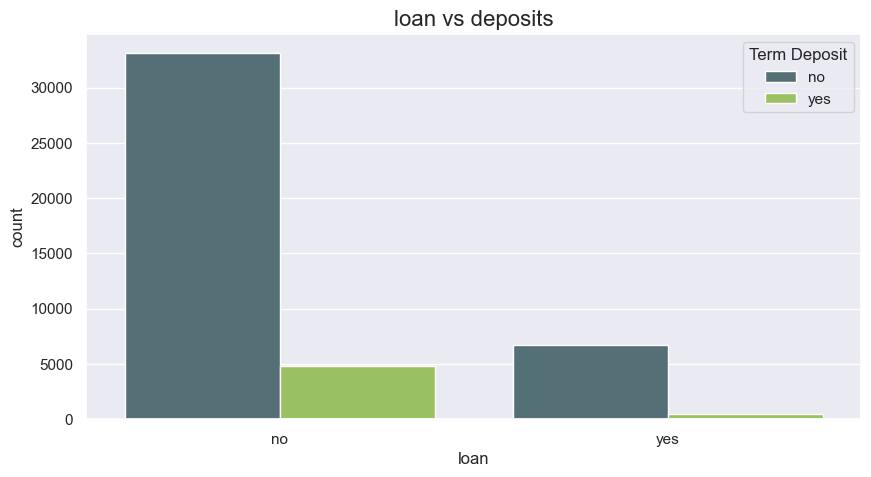

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df.loan, hue=df['Term Deposit'], palette=['#50727B', '#9BCF53'])
plt.title('loan vs deposits', fontsize=16)
plt.xlabel('loan')
plt.show()

#### Observation 
1. Customers with housing & loans are least subscribed to Term deposit

#### Contacts

In [44]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [45]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

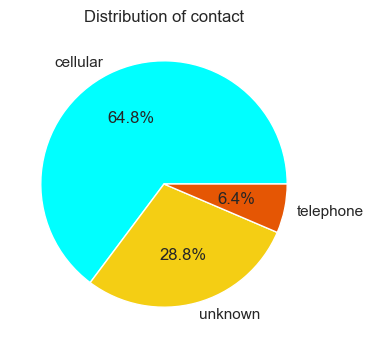

In [46]:
marital_counts = df['contact'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(marital_counts, labels=marital_counts.index,
        autopct='%1.1f%%', colors=['aqua', '#F4CE14', '#E55604'])
plt.title('Distribution of contact')
plt.show()

### Month

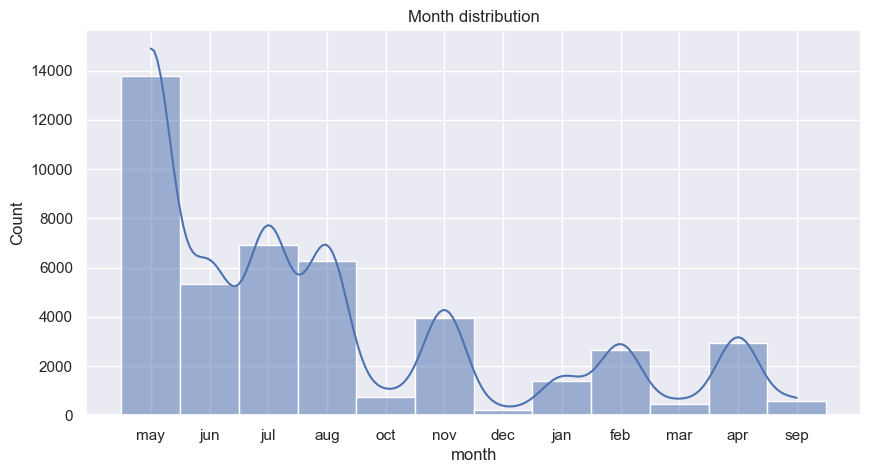

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x=df.month, bins=10, kde=True)
plt.title('Month distribution')
plt.show()

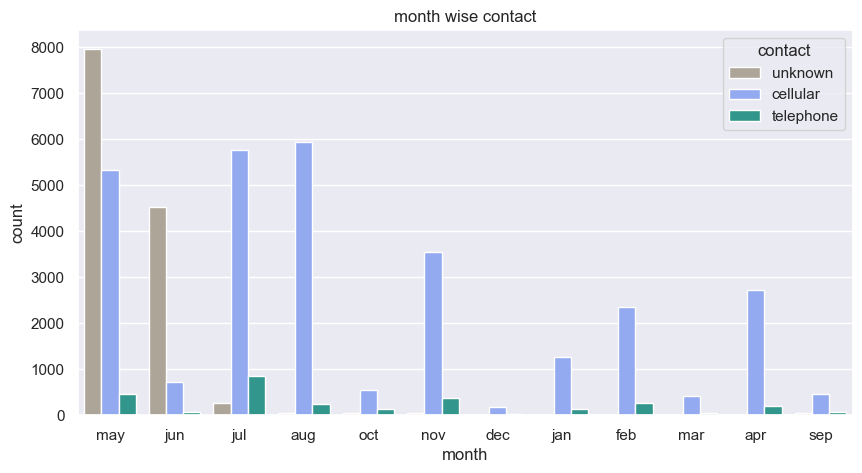

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df.month, hue=df['contact'], palette=['#B0A695','#83A2FF', '#22A699'])
plt.title('month wise contact')
plt.show()

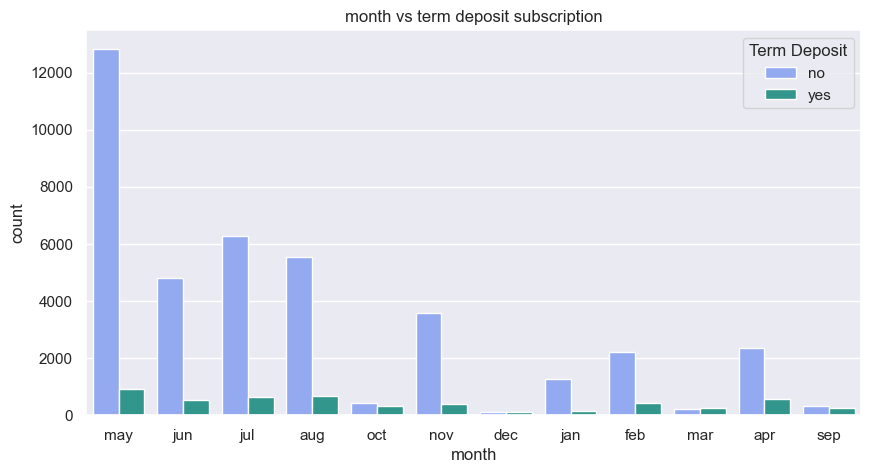

In [49]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x=df.month, hue=df['Term Deposit'], palette=['#83A2FF', '#22A699'])
plt.title('month vs term deposit subscription')
plt.show()

#### Observations
1. There are several customers who have been last contacted in the month of May.
2. Least contacted months are March, September, October and December. Otherwise customers have been last contacted fairly in remaining months.

## Distribution of Target Data (Term Deposit)

In [50]:
df['Term Deposit'].value_counts()

Term Deposit
no     39922
yes     5289
Name: count, dtype: int64

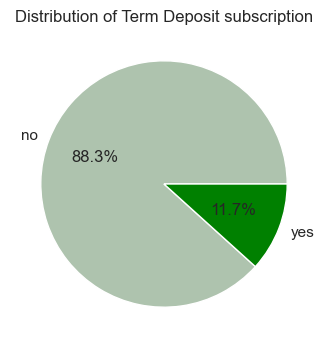

In [51]:
term_deposit_count = df['Term Deposit'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(term_deposit_count, labels=term_deposit_count.index,
        autopct='%1.1f%%', colors=['#AEC3AE', 'green'])
plt.title('Distribution of Term Deposit subscription')
plt.show()

### Term Deposit 
#### Yes - 11.7%
#### No  -  88.3%

### Observation
1. **Looking at the proportion of the classes we like to predict, we see that the dataset is imbalanced.**

# Data Preprocessing

In [52]:
df_clean = dataset.copy()
df_clean.rename(columns={'y': 'Term Deposit'}, inplace=True)

Dropping Records with **unknown** jobs and education

In [53]:
df_clean = df_clean[df_clean['job']!= 'unknown']

In [54]:
df_clean = df_clean[df_clean['education']!='unknown']

**Dropping duration, default and day features**
1. **duration** cannot be known before a call is made. Only at the end of the call duration is known and as is target. So this feature is removed.
2. droping **default** column as majoriry is no and doesnt give much insights hence it will not add any value in prediction
3. It seems to me that the variable  **day** has no relevance for the prediction. 

In [55]:
df_clean.drop(['duration', 'default','day'],axis=1, inplace=True)

In [56]:
df_clean.head()

age           job  marital  education  balance housing loan  contact month  \
0   58    management  married   tertiary     2143     yes   no  unknown   may   
1   44    technician   single  secondary       29     yes   no  unknown   may   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown   may   
5   35    management  married   tertiary      231     yes   no  unknown   may   
6   28    management   single   tertiary      447     yes  yes  unknown   may   

   campaign  pdays  previous poutcome Term Deposit  
0         1     -1         0  unknown           no  
1         1     -1         0  unknown           no  
2         1     -1         0  unknown           no  
5         1     -1         0  unknown           no  
6         1     -1         0  unknown           no

In [57]:
df_clean.shape

(43193, 14)

#### Removing  outliers using Zscore 

In [58]:
def remove_outliers(col, data):
    outlier_col = col + "_outliers"
    data[outlier_col] = data[col]
    data[outlier_col]= zscore(data[outlier_col])

    condition = (data[outlier_col]>3) | (data[outlier_col]<-3)
    print(data[condition].shape)
    data.drop(data[condition].index, axis = 0, inplace = True)
    data.drop(outlier_col, axis=1, inplace=True)

In [59]:
#remove outliers for 'balance' feature
remove_outliers('balance', df_clean)

(709, 15)


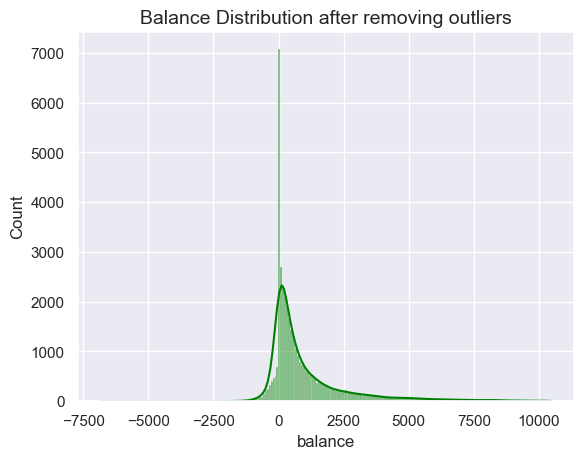

In [60]:
sns.histplot(data=df_clean, x='balance', color='green', kde=True)
plt.title('Balance Distribution after removing outliers', fontsize=14)
plt.xlabel('balance')
plt.ylabel('Count')
plt.show()

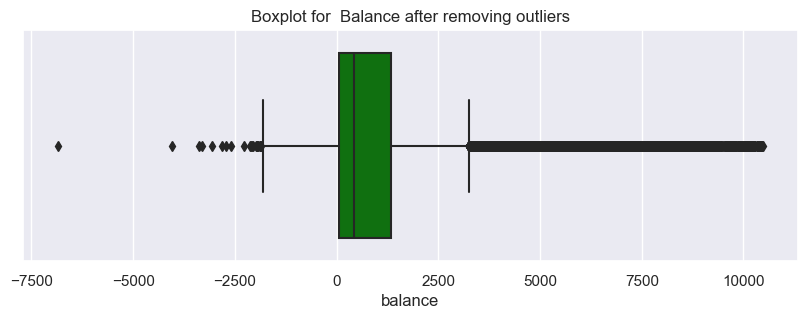

In [61]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean.balance, showfliers=True,
            showbox=True, whis=1.5, color='green')
plt.title('Boxplot for  Balance after removing outliers')
plt.show()

In [62]:
# remove outliers for 'pdays' feature
remove_outliers('pdays', df_clean)

(1581, 15)


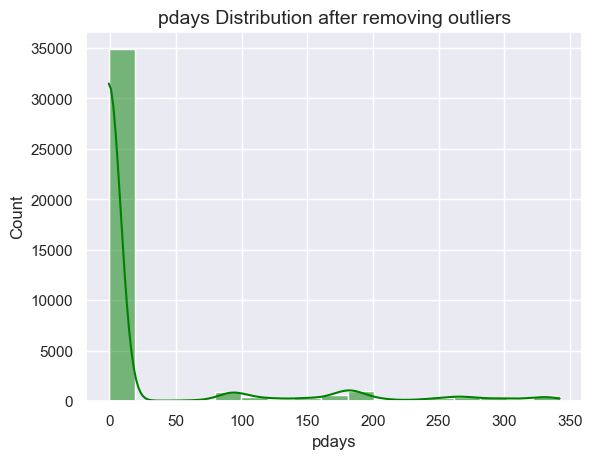

In [63]:
sns.histplot(data=df_clean, x='pdays', color='green', kde=True)
plt.title('pdays Distribution after removing outliers', fontsize=14)
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()

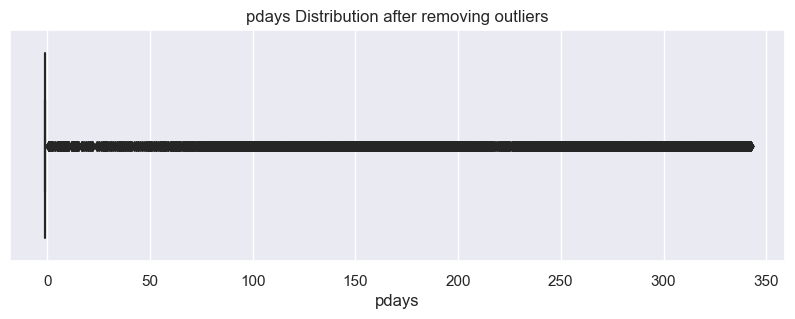

In [64]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean.pdays, showfliers=True, showbox=True, whis=1.5, color='green')
plt.title('pdays Distribution after removing outliers')
plt.show()

In [65]:
# remove ouliers for 'previous' feature
remove_outliers('previous', df_clean)

(474, 15)


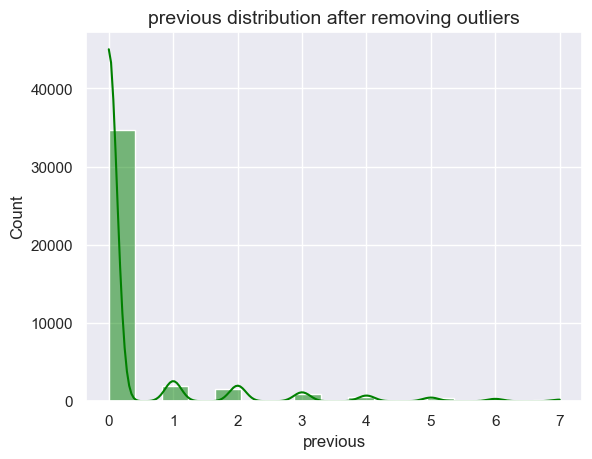

In [66]:
sns.histplot(data=df_clean, x='previous', color='green', kde=True)
plt.title('previous distribution after removing outliers', fontsize=14)
plt.xlabel('previous')
plt.ylabel('Count')
plt.show()

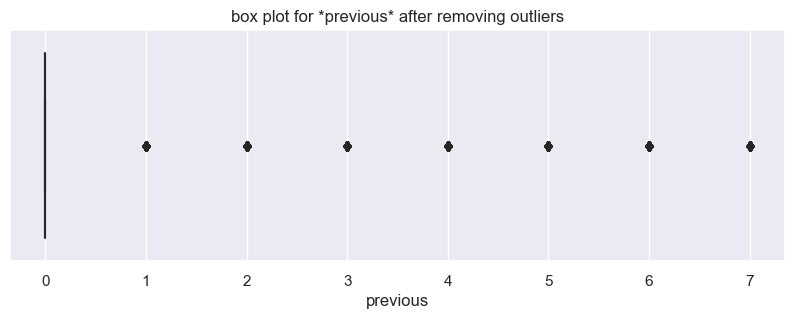

In [67]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clean.previous, showfliers=True, showbox=True, whis=1.5, color='green')
plt.title('box plot for *previous* after removing outliers')
plt.show()

#### As we can see, there are some categorical features that need to be encoded.

In [68]:
print('categorical columns')
df_clean.select_dtypes(include=object).columns.to_list()

categorical columns


['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Term Deposit']

#### one hot encoding
one-hot encoding for nominal categorical data

In [69]:
df_clean = pd.get_dummies(df_clean, prefix=['job','marital','education','month', 'contact','poutcome'],
                         columns=['job','marital','education','month','contact','poutcome'], dtype='int64')

In [70]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40429 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  40429 non-null  int64 
 1   balance              40429 non-null  int64 
 2   housing              40429 non-null  object
 3   loan                 40429 non-null  object
 4   campaign             40429 non-null  int64 
 5   pdays                40429 non-null  int64 
 6   previous             40429 non-null  int64 
 7   Term Deposit         40429 non-null  object
 8   job_admin.           40429 non-null  int64 
 9   job_blue-collar      40429 non-null  int64 
 10  job_entrepreneur     40429 non-null  int64 
 11  job_housemaid        40429 non-null  int64 
 12  job_management       40429 non-null  int64 
 13  job_retired          40429 non-null  int64 
 14  job_self-employed    40429 non-null  int64 
 15  job_services         40429 non-null  int64 
 16  job_stude

Label encoding binary attributes
housing, loan, Term deposit

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
def label_encoder(data, categorial_col):
    encoded_data = data.copy()
    encoder = LabelEncoder()
    for column in categorial_col:
        column_data = data[[column]]
        encoded_values = encoder.fit_transform(column_data.values.ravel())
        encoded_data[column] = encoded_values.astype('uint8')
    return encoded_data

In [73]:
categorical_columns_to_encode = ['housing', 'loan', 'Term Deposit']
df_clean = label_encoder(df_clean, categorical_columns_to_encode)

In [74]:
df_clean.head()

age  balance  housing  loan  campaign  pdays  previous  Term Deposit  \
0   58     2143        1     0         1     -1         0             0   
1   44       29        1     0         1     -1         0             0   
2   33        2        1     1         1     -1         0             0   
5   35      231        1     0         1     -1         0             0   
6   28      447        1     1         1     -1         0             0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
5           0                0                 0              0   
6           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
5               1            0                  0             0            0   
6               1            0                  0             0            0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0               0               0                 0                1   
1               1               0                 0                0   
2               0               0                 0                1   
5               0               0                 0                1   
6               0               0                 0                0   

   marital_single  education_primary  education_secondary  education_tertiary  \
0               0                  0                    0                   1   
1               1                  0                    1                   0   
2               0                  0                    1                   0   
5               0                  0                    0                   1   
6               1                  0                    0                   1   

   month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
5          0          0          0          0          0          0   
6          0          0          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
5          0          0          1          0          0          0   
6          0          0          1          0          0          0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
5                 0                  0                1                 0   
6                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
5               0                 0                 1  
6               0                 0                 1

In [75]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40429 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40429 non-null  int64
 1   balance              40429 non-null  int64
 2   housing              40429 non-null  uint8
 3   loan                 40429 non-null  uint8
 4   campaign             40429 non-null  int64
 5   pdays                40429 non-null  int64
 6   previous             40429 non-null  int64
 7   Term Deposit         40429 non-null  uint8
 8   job_admin.           40429 non-null  int64
 9   job_blue-collar      40429 non-null  int64
 10  job_entrepreneur     40429 non-null  int64
 11  job_housemaid        40429 non-null  int64
 12  job_management       40429 non-null  int64
 13  job_retired          40429 non-null  int64
 14  job_self-employed    40429 non-null  int64
 15  job_services         40429 non-null  int64
 16  job_student          40429 

#### Dropping redundant  features as the information will be obtained from the other classes


In [76]:
df_clean.drop(['job_student', 'job_unemployed', 'job_entrepreneur','month_sep', 'month_dec' ,'contact_telephone','marital_divorced'],
              axis=1, inplace=True)

### Split Dataset

In [77]:
X = df_clean.drop('Term Deposit', axis=1)
y = df_clean['Term Deposit']

### Train - Test Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print('X_train.shape : ', X_train.shape)

print('X_test.shape : ', X_test.shape)

X_train.shape :  (32343, 36)
X_test.shape :  (8086, 36)


### Scaling Data

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Original Data Distribution (Training Set)')

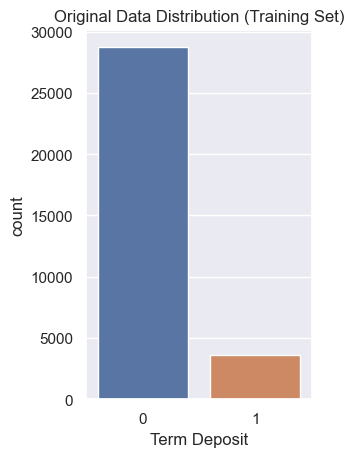

In [84]:
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Data Distribution (Training Set)")

## Oversampling the data
**since the data is imbalanced**

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Data Distribution After SMOTE')

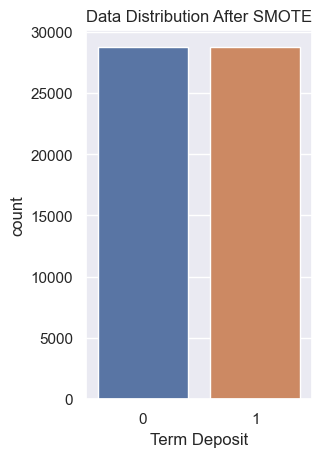

In [87]:
plt.subplot(1, 2, 2)
sns.countplot(x=y_train)
plt.title("Data Distribution After SMOTE")

## Model Training and Testing

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression Approach

In [89]:
lr = LogisticRegression(solver='liblinear',random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [90]:
y_train_pred = lr.predict(X_train)
print('Accuracy on Training data')
print("Accuracy: {0:.3f}".format(accuracy_score(y_train, y_train_pred)))

Accuracy on Training data
Accuracy: 0.707


In [91]:
print('Report on Training Data')
print(classification_report(y_train, y_train_pred))

Report on Training Data
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     28745
           1       0.73      0.65      0.69     28745

    accuracy                           0.71     57490
   macro avg       0.71      0.71      0.71     57490
weighted avg       0.71      0.71      0.71     57490



In [92]:
y_test_pred = lr.predict(X_test)
print('Accuracy on Testing data')
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy on Testing data
Accuracy: 0.747


In [93]:
print('Report on Testing Data')
print(classification_report(y_test, y_test_pred))

Report on Testing Data
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7148
           1       0.26      0.66      0.38       938

    accuracy                           0.75      8086
   macro avg       0.60      0.71      0.61      8086
weighted avg       0.87      0.75      0.79      8086



Confusion Matrix : 
 [[5427 1721]
 [ 321  617]]


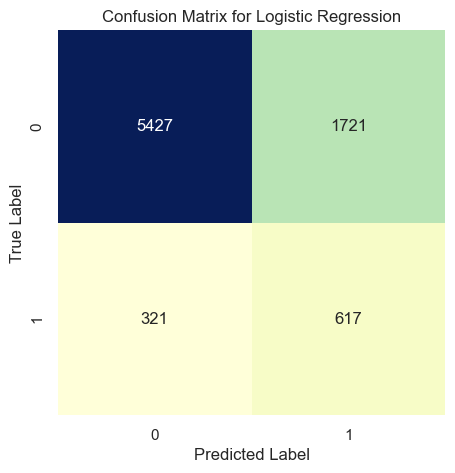

In [94]:
cm1 = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix : \n',cm1)
plt.figure(figsize=(5, 5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Decision Tree Classifier Approach

In [95]:
dc = DecisionTreeClassifier(random_state=42)
dc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
y_train_pred_dc = dc.predict(X_train)

In [97]:
print('Accuracy on Training data')
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_dc)))

Accuracy on Training data
Model accuracy score with 10 decision-trees : 0.9998


In [98]:
print('Report on Training Data')
print(classification_report(y_train, y_train_pred_dc))

Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28745
           1       1.00      1.00      1.00     28745

    accuracy                           1.00     57490
   macro avg       1.00      1.00      1.00     57490
weighted avg       1.00      1.00      1.00     57490



In [99]:
y_test_pred_dc = dc.predict(X_test)

In [100]:
print('Accuracy on Testing data')
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_dc)))

Accuracy on Testing data
Model accuracy score with 10 decision-trees : 0.8027


In [101]:
print('Report on Testing Data')
print(classification_report(y_test, y_test_pred_dc))

Report on Testing Data
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      7148
           1       0.25      0.35      0.29       938

    accuracy                           0.80      8086
   macro avg       0.58      0.60      0.59      8086
weighted avg       0.83      0.80      0.82      8086



Confusion Matrix : 
 [[6167  981]
 [ 614  324]]


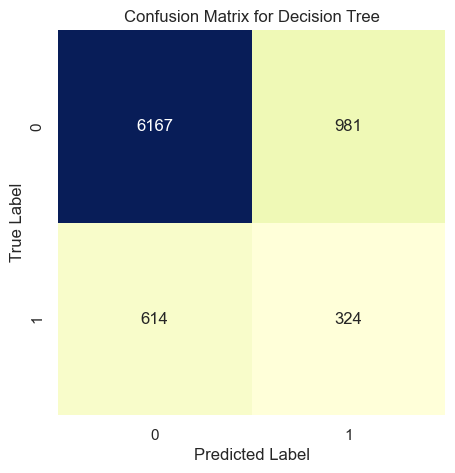

In [102]:
cm2 = confusion_matrix(y_test, y_test_pred_dc)
print('Confusion Matrix : \n',cm2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Random Forest Classifier Approach

In [103]:
rnd = RandomForestClassifier(random_state=42)
rnd.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y_train_pred_cl = rnd.predict(X_train)

In [105]:
print('Accuracy on Training data')
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_train_pred_cl)))

Accuracy on Training data
Model accuracy score with 10 decision-trees : 0.9998


In [106]:
print('Report on Training Data')
print(classification_report(y_train, y_train_pred_cl))

Report on Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28745
           1       1.00      1.00      1.00     28745

    accuracy                           1.00     57490
   macro avg       1.00      1.00      1.00     57490
weighted avg       1.00      1.00      1.00     57490



In [107]:
y_test_pred_cl = rnd.predict(X_test)

In [108]:
print('Accuracy on Testing data')
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_cl)))

Accuracy on Testing data
Model accuracy score with 10 decision-trees : 0.8677


In [109]:
print('Report on Testing Data')
print(classification_report(y_test, y_test_pred_cl))

Report on Testing Data
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7148
           1       0.41      0.30      0.35       938

    accuracy                           0.87      8086
   macro avg       0.66      0.62      0.64      8086
weighted avg       0.85      0.87      0.86      8086



Confusion Matrix : 
 [[6731  417]
 [ 653  285]]


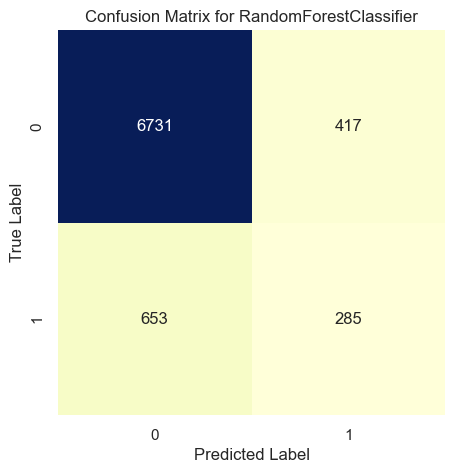

In [110]:
cm3 = confusion_matrix(y_test, y_test_pred_cl)
print('Confusion Matrix : \n',cm3)
plt.figure(figsize=(5, 5))
sns.heatmap(cm3, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix for RandomForestClassifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Accuracy of the models

1. **LogisticRegression : 
     74.7%**
    
2. **DecisionTreeClassifier : 
     80.2%**
    
3. **RandomForestClassifier :
     86%**

## END 